## Week 3: Simple 2-mode Network 

Mael Illien, Jeremy O'Brian, Vanita Thompson

### Assignment:

In [20]:
The [Davis Southern Club women](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis) is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events.

DATASET: [DAVIS](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/davis.dat)

DESCRIPTION: One 18×14 matrix, binary.

BACKGROUND: These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

What can you infer about the relationships between (1) the women, and (2) the social events?

### Load Libraries

In [27]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
from scipy import stats
from pylab import rcParams
import math
%matplotlib inline

### Data Extraction

The Davis Southern Club Women data set was collected by Davis et al. This data set is also included with the NetworkX package and comes as a bipartite graph (clubs, women) with event attendance data.

In [28]:
#loading data from the networkx package
G = nx.davis_southern_women_graph()

Previwing some details, starting with nodes and edges.

In [29]:
G.nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

There are  2 modes - women and events.

In [30]:
G.edges()

EdgeView([('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('Theresa Anderson', 'E4'), ('Theresa Anderson', 'E5'), ('Theresa Anderson', 'E6'), ('Theresa Anderson', 'E7'), ('Theresa Anderson', 'E8'), ('Theresa Anderson', 'E9'), ('Brenda Rogers', 'E1'), ('Brenda Rogers', 'E3'), ('Brenda Rogers', 'E4'), ('Brenda Rogers', 'E5'), ('Brenda Rogers', 'E6'), ('Brenda Rogers', 'E7'), ('Brenda Rogers', 'E8'), ('Charlotte McDowd', 'E3'), ('Charlotte McDowd', 'E4'), ('Charlotte McDowd', 'E5'), ('Charlotte McDowd', 'E7'), ('Frances Anderson', 'E3'), ('Frances Anderson', 'E5'), ('F

The edges represent women's attendance to an event.

In [31]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 89\nAverage degree:   5.5625'

nx.info provides a total number of nodes (number of women plus number of events) and edges (total number of attendees at each event). Additionally, we compute an average degree, which, in this 2-mode dataset, and is a mix of average events attended by women and average number of women at events.

### Visualization

Visualizing a 2-mode network, utilizing a nodelist to distinguish between women and events.

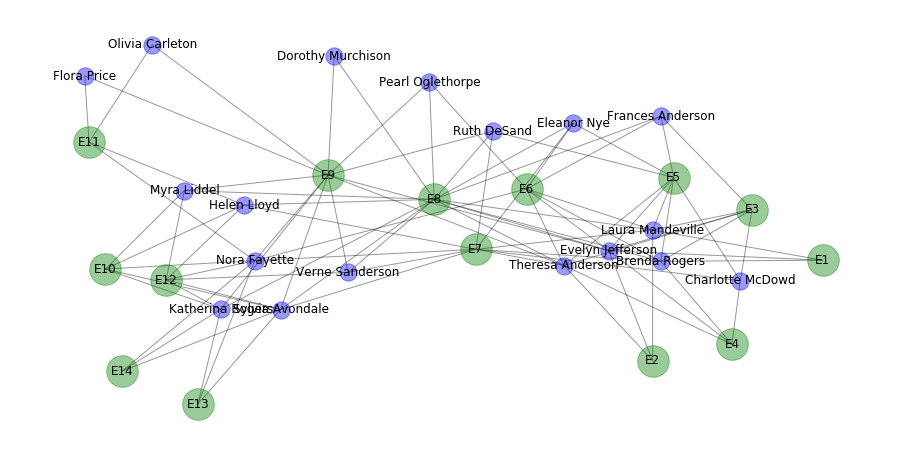

In [34]:
women, events = nx.bipartite.sets(G)
plt.rcParams["figure.figsize"] = (16,8)
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='blue', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='green', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

The fourteen events and the eighteen women have various connections. From the above, you can tell that, among the events, the seventh, eighth, and ninth events had the most participants.  Among women, Evelynn Jefferson, Theresa Anderson, and Nora Fayette attended the most events. We'll see this calculated using networkx distance measures next.

Looking at the graph, you can there are at least two distinct cliques, each of which had four events that were attended almost only by those cliques. And there are a handful of events attended by women from both cliques and women who do not appear to belong to either of the clear cliques. We'll look more at these later.

Now, back to the distance measures.

In [35]:
print('center =', nx.center(G))
print('diameter =', nx.diameter(G))
print('radius =', nx.radius(G))

center = ['Evelyn Jefferson', 'Theresa Anderson', 'Ruth DeSand', 'Verne Sanderson', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'E6', 'E7', 'E8', 'E9']
diameter = 4
radius = 3


In [9]:
list(G.degree())

[('Evelyn Jefferson', 8),
 ('Laura Mandeville', 7),
 ('Theresa Anderson', 8),
 ('Brenda Rogers', 7),
 ('Charlotte McDowd', 4),
 ('Frances Anderson', 4),
 ('Eleanor Nye', 4),
 ('Pearl Oglethorpe', 3),
 ('Ruth DeSand', 4),
 ('Verne Sanderson', 4),
 ('Myra Liddel', 4),
 ('Katherina Rogers', 6),
 ('Sylvia Avondale', 7),
 ('Nora Fayette', 8),
 ('Helen Lloyd', 5),
 ('Dorothy Murchison', 2),
 ('Olivia Carleton', 2),
 ('Flora Price', 2),
 ('E1', 3),
 ('E2', 3),
 ('E3', 6),
 ('E4', 4),
 ('E5', 8),
 ('E6', 8),
 ('E7', 10),
 ('E8', 14),
 ('E9', 12),
 ('E10', 5),
 ('E11', 4),
 ('E12', 6),
 ('E13', 3),
 ('E14', 3)]

In this case, degrees represent the number of events a woman attended.

Let's create a bipartite graph focused on the women nodes, which basically removes the events. If a woman attended an event with another, we're going to call them friends below. 

### Plots

In [36]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))


#Friends, Member
15 Laura Mandeville
17 Theresa Anderson
17 Nora Fayette
15 Frances Anderson
16 Myra Liddel
17 Verne Sanderson
16 Dorothy Murchison
17 Sylvia Avondale
17 Ruth DeSand
17 Evelyn Jefferson
11 Charlotte McDowd
15 Brenda Rogers
15 Eleanor Nye
12 Flora Price
17 Helen Lloyd
16 Pearl Oglethorpe
12 Olivia Carleton
16 Katherina Rogers


Charlotte McDowd, who appears in the lower left clique in our original 2-mode visualization, has only 11 "friends," which matches what we saw.

C:\Users\thomp\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:524: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\thomp\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:534: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


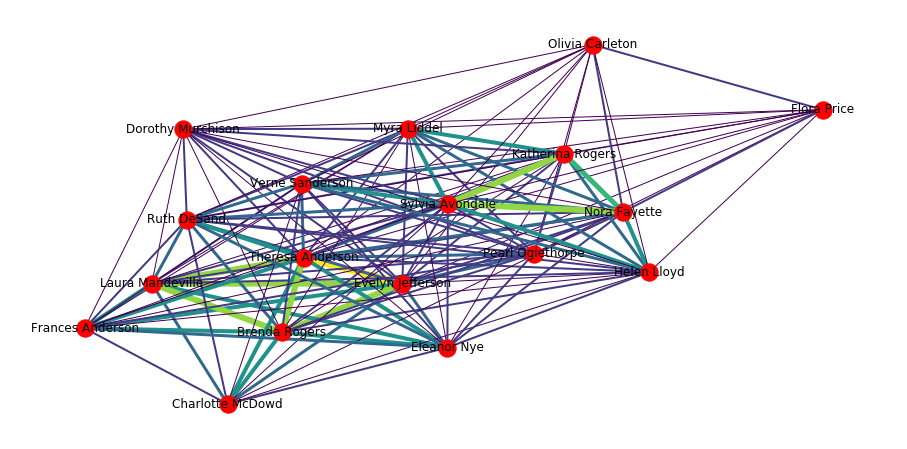

In [37]:
# Above data shows the number of friends each woman has.  The following shows the detialed relationship amoung this group.
women = G.graph['top']
W = bipartite.weighted_projected_graph(G, women,ratio=False)
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(W, k=0.1,iterations=20, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

In [38]:
# Summary statics for women-only node network
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


In [39]:
# Women Cliques
list(nx.find_cliques(W))

[['Theresa Anderson',
  'Nora Fayette',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Ruth DeSand',
  'Evelyn Jefferson',
  'Helen Lloyd',
  'Charlotte McDowd',
  'Laura Mandeville',
  'Brenda Rogers',
  'Eleanor Nye',
  'Frances Anderson'],
 ['Theresa Anderson',
  'Nora Fayette',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Ruth DeSand',
  'Evelyn Jefferson',
  'Helen Lloyd',
  'Katherina Rogers',
  'Myra Liddel',
  'Dorothy Murchison',
  'Pearl Oglethorpe',
  'Laura Mandeville',
  'Frances Anderson',
  'Eleanor Nye',
  'Brenda Rogers'],
 ['Theresa Anderson',
  'Nora Fayette',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Ruth DeSand',
  'Evelyn Jefferson',
  'Helen Lloyd',
  'Katherina Rogers',
  'Myra Liddel',
  'Dorothy Murchison',
  'Pearl Oglethorpe',
  'Flora Price',
  'Olivia Carleton']]

Removing the events from the dataset, we see two cliques, though they are larger than we might have drawn when looking at the two-node graph.

### Relationships Between Social Events

We repeat the bipartite steps to isolate the events.

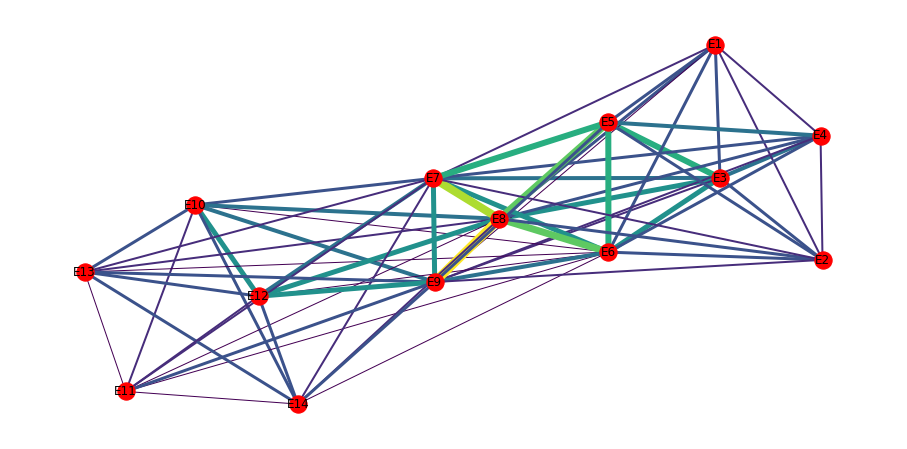

In [42]:
eventss = G.graph['bottom']
E = bipartite.weighted_projected_graph(G, events,ratio=False)
weights = [edata['weight'] for f,t,edata in E.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(E, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

### Analysis

In [43]:
#Statistical Analysis
print(nx.info(E))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


In [44]:
# Degree centrality (number of women attend the events)
d_E = E.degree(E)
pd.DataFrame(d_E, columns=["Social Events", "Degree"])

,Social Events,Degree
0,E3,8
1,E1,8
2,E4,8
3,E10,8
4,E6,13
5,E8,13
6,E7,13
7,E13,8
8,E12,8
9,E11,8


### Conclusion